- want cooccurance plots for each MCM
- want want to cluster them etc. see notes
- want them for same MCM but different sizes

In [3]:
import numpy as np
import os
import json
import sys
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

sys.path.append("../")
import src.plot as myplot



In [2]:
# lets first load some example MCM
data_path = "../OUTPUT/sample_sizes"
sample_size = 10
fname = "MCMs.json"
with open(os.path.join(data_path,str(sample_size), fname), "r") as f:
        test_MCMs = json.load(f)

In [59]:
def create_cooccurance_matrix(mcm):
    """
    Create a co-occurrence matrix based on the given MCMs.

    :param MCMs: A list or nparray with strings of nr_pixel elements that are either 0 or 1.
    :type MCMs: list or np.ndarray
    :return: The ordered co-occurrence matrix.
    :rtype: np.ndarray
    """
    mcm = np.genfromtxt(mcm, delimiter=1, dtype=int)
    pairs = np.argwhere(mcm == 1).T
    nr_pixels = len(pairs[0])
    matrix = np.zeros((nr_pixels, nr_pixels))

    # fill the groupings into the co-occurrence matrix
    for icc in np.unique(pairs[0]):
        pixels = pairs[1][pairs[0] == icc]
        matrix[np.ix_(pixels, pixels)] = 1
        
    # cluster MCMs together


    return matrix

def do_cluster(matrix, via_matrix=None):
    """
    Perform hierarchical clustering on a given matrix.
    Can provide via_matrix to base the clustering of "matrix" on the dendrogram of "via_matrix". 

    :param matrix: The input matrix for clustering.
    :type matrix: numpy.ndarray
    :param via_matrix: Optional matrix to base the clustering of "matrix" on. Clustering will be performed on "via_matrix" and applied to "matrix".
    :type return_dendro: numpy.ndarray
    :return: The clustered matrix
    :rtype: numpy.ndarray
    """
    
    if via_matrix is None:
        out = matrix.copy()
        matrix = via_matrix
    else:
        out = matrix

    linkage = sch.linkage(matrix, method='average')
    dendrogram = sch.dendrogram(linkage, no_plot=True)
    return out[:, dendrogram['leaves']][dendrogram['leaves']]

In [60]:
# get m1, m2 for same MCM but different sample sizes
# add them together with + s.t. we get unique colors for some that are only in one but not the other -> think about directionality here as well
MCM_idx = 0
coom_a = create_cooccurance_matrix(test_MCMs[MCM_idx])
comm_

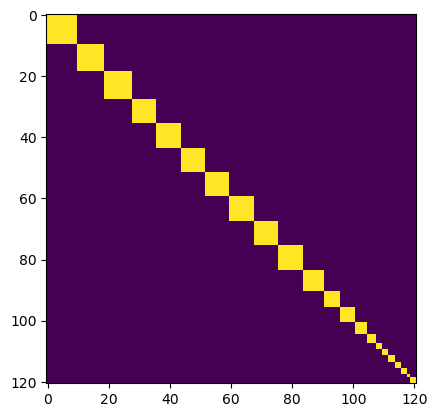

In [61]:

plt.imshow(do_cluster(coom, coom))

In [9]:
import seaborn as sns


In [53]:
g = sns.clustermap(do_cluster(coom), cmap="tab20c_r", linewidth=.99,
                    edgecolor="white", 
                    dendrogram_ratio=(1e-10,1e-10), # This line 
                    figsize=(15,15),
                    xticklabels=False,
                    yticklabels=False,
                    row_cluster=False,
                    col_cluster=False,
                    cbar=False)
# g.ax_row_dendrogram.remove()
# g.ax_col_dendrogram.remove()
g.ax_heatmap.set_facecolor("gray")

g.cax.set_visible(False)
plt.close()

------------------------------

In [ ]:
test_mcm = test_MCMs[0]
test_mcm = np.genfromtxt(test_mcm,delimiter=1,dtype=int)


idx_pairs = np.argwhere(test_mcm==1).T
cooocurance_matrix = np.zeros((121,121))

cooocurance_matrix[idx_pairs[0],idx_pairs[1]] = 1
cooocurance_matrix[idx_pairs[1],idx_pairs[0]] = 1

plt.imshow(cooocurance_matrix)

mcm = np.array(["11000", "00111"],dtype=str)

mcm